<b> No-Atmosphere Climate Model </b><br>
Source: Walter A. Robinson, Modeling Dynamic Climate Systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')

In [2]:
# Seconds per year
seconds_per_year = 24 * 60 * 60 * 365

# Step size
dt = 0.1

# Min-Max time
tmin = 0
tmax = 10
t = np.arange(tmin, tmax + dt, dt)

n = len(t)

In [3]:
# Albedo
albedo = 0.3

# Initial temperature
temp_k = 273.15 # K

# Stefan-Boltzmann constant
sigma = 5.6696e-8 # W/m^2*K^4

# Solar constant
solar_const = 1367 # W/m^2

# Density of water
water_density = 1000 # kg/m^3

# Depth of the mixed layer
depth_mixed_layer = 50 # m

# Specific heat capacity of water
spec_heat_water = 4218 # J/kg*K

In [4]:
# Heat capacity of the mixed layer
heat_capacity = water_density * depth_mixed_layer * spec_heat_water

In [5]:
# Inflow: Absorbed solar energy
solar = solar_const/4 * (1 - albedo) * seconds_per_year

In [6]:
# Array to store the result
ts = np.zeros((n,))

# Set initial temperature
ts[0] = temp_k

# Euler method
for k in range(1, n):

    # Outflow: IR
    ir = sigma * ts[k-1]**4 * seconds_per_year

    # Temperature = Energy/Heat capacity
    energy = ts[k-1] * heat_capacity + (solar - ir) * dt
    ts[k] = energy/heat_capacity

In [7]:
# Convert to °C
ts = ts - 273.15

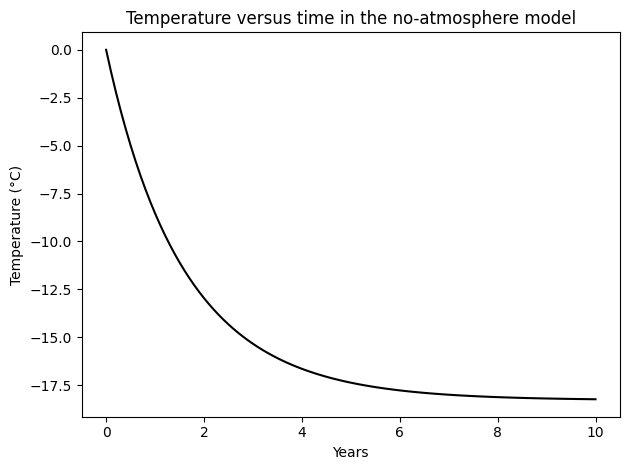

In [8]:
# Creates a figure and one subplot
fig, ax = plt.subplots()
ax.set_xlabel("Years")
ax.set_ylabel("Temperature (°C)")
ax.set_title("Temperature versus time in the no-atmosphere model")

# Plot the data
ax.plot(t, ts, c='k')
plt.tight_layout()
plt.show()